**Chapter 4 – Arbre de décision**
Cas de la détection de spam. Toutes les varaibles sont de type numérique. Nous n'avons pas donc besoin de l'encodage avec OneHitEncoder ou get_dummies pour transformer chauqe variable qualtative (sa modalité) en un cdoe d'index (numérique)

In [1]:
#importatation de modules commun

import numpy as np
import pandas as pd

# pour la génération de seed
np.random.seed(4)

# pur l'afficae de figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt


In [2]:
#lecture des deux datasets Train_spam et Test_spam
#voici le lien pour le dataset pour avoir plus d'information
#https://archive.ics.uci.edu/ml/datasets/spambase
#Je l'ai scindé en un jeu d'entrainement et de test.

data_train = pd.read_csv("Train_spam.CSV")
data_test = pd.read_csv("Test_spam.CSV")

In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3680 entries, 0 to 3679
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              3680 non-null   float64
 1   word_freq_address           3680 non-null   float64
 2   word_freq_all               3680 non-null   float64
 3   word_freq_3d                3680 non-null   float64
 4   word_freq_our               3680 non-null   float64
 5   word_freq_over              3680 non-null   float64
 6   word_freq_remove            3680 non-null   float64
 7   word_freq_internet          3680 non-null   float64
 8   word_freq_order             3680 non-null   float64
 9   word_freq_mail              3680 non-null   float64
 10  word_freq_receive           3680 non-null   float64
 11  word_freq_will              3680 non-null   float64
 12  word_freq_people            3680 non-null   float64
 13  word_freq_report            3680 

In [4]:
data_train.shape

(3680, 58)

In [5]:
data_test.shape

(921, 58)

In [6]:
data_train.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Class
0,0.09,0.0,0.09,0.0,0.39,0.09,0.09,0.00,0.19,0.29,...,0.000,0.139,0.0,0.310,0.155,0.0,6.813,494,1458,1
1,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.124,0.124,0.0,0.000,0.000,0.0,1.800,8,45,0
2,0.00,0.0,2.43,0.0,0.00,0.00,0.00,0.00,0.27,0.00,...,0.000,0.344,0.0,0.000,0.000,0.0,2.319,12,167,0
3,0.00,0.0,0.00,0.0,1.31,0.00,1.31,1.31,1.31,1.31,...,0.000,0.000,0.0,0.117,0.117,0.0,48.500,186,291,1
4,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.000,0.000,0.0,2.307,8,30,0


In [7]:
# Séparer des données des variables prédictives (X) 
# de la variable cible (Y)
X_train=data_train.iloc[:,:-1]
y_train=data_train['Class']

# Entrainement et visualisation

In [8]:
#Maintenant, nous pouvons entrainer  pour constuire un classeur : clf
#en utilisant le nouveau dataframe modifié.:

#l'option criterion : indique l'utilisation de l'entropie 
#comme heuristique pour le choix de la meilleure variable

from sklearn.tree import DecisionTreeClassifier
clf= DecisionTreeClassifier(criterion="entropy")
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

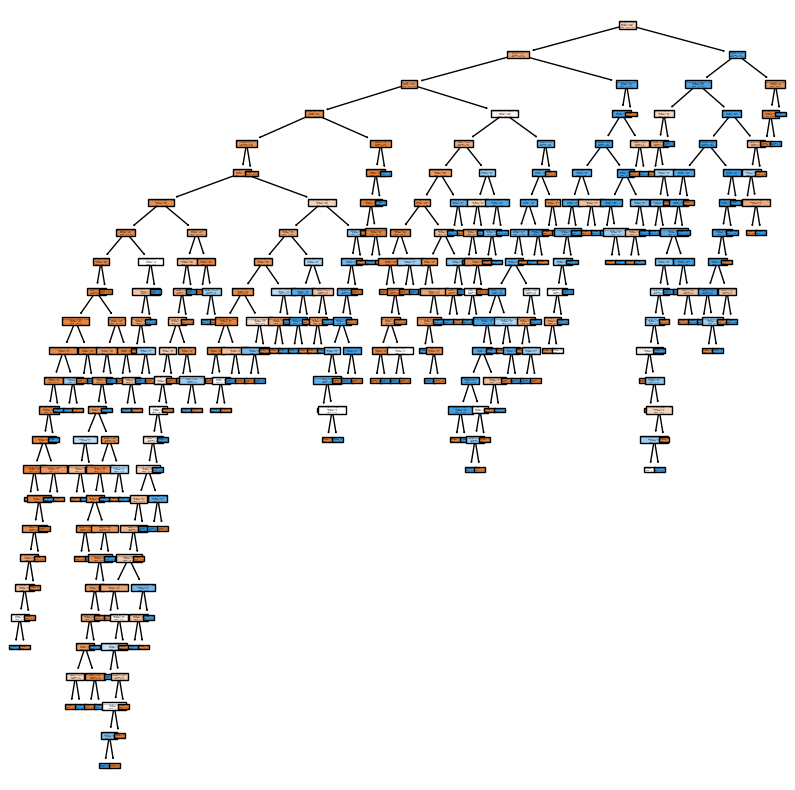

In [9]:
#affichage de l'arbre
from sklearn.tree import plot_tree
plt.figure(figsize=(10,10))
plot_tree(clf, feature_names=list(data_train.columns[:-1]), filled=True)
plt.show()

## Validation avec un jeu de test

Validation du classeur clf avec le jeu de test.
Il faut s'assurer que le jeu de test est dans la même configuration


In [10]:
#séparons les donnees de test des variables prédictives de celles 
#de la variable cible

X_test=data_test.iloc[:,:-1]
y_test=data_test['Class']

In [11]:
#Voici un exemple de résultat de test avec le modele clf obtenu initialement 
# avec les données de test

from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

# le résultat est de l'ordre de 100%
#c'est normal car le modele a été entrainé 
#et testé avec les même données !

0.9283387622149837